In [1]:
from fears.population import Population
from fears.utils import fitness, plotter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def int_to_binary(num,n_genotype=4):
    """
    Converts an integer to binary representation with the number of 
    digits equal to the number of alleles in the model.

    Parameters
    ----------
    num : int
        Number to be converted.

    Returns
    -------
    str
        Binary representation.

    """
    pad = int(np.log2(n_genotype))
    return bin(num)[2:].zfill(pad)

cmap = sns.color_palette("colorblind", as_cmap=True)[0:4]

Text(-0.1, 1.05, 'B')

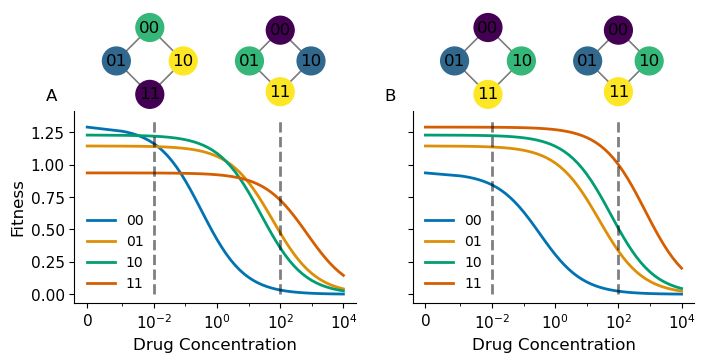

In [2]:
drug_conc_range = [-3,5]
p = Population(fitness_data='random',
               death_model=None,
               n_allele=2,
               death_rate=0.1,
               drug_conc_range = drug_conc_range,
               ic50_limits=[-2.5,3],
               drugless_limits=[0.8,1.5])

p.drugless_rates = [1.28949852, 1.14399848, 1.22802236, 0.93619847]
p.ic50 = [-0.49205992, 1.76224515,  1.39341393,  2.84653598]

xdata = np.logspace(-3,4)
xdata = np.append([0],xdata)

fig,ax_list = plt.subplots(ncols=2,figsize=(8,2.5),sharey=True,sharex=True)


ax = ax_list[0]
for i in range(4):
    ydata = []
    for x in xdata:
        ydata.append(fitness.gen_fitness(p,i,x))
    ax.plot(xdata,ydata,linewidth=2,label=int_to_binary(i),color=cmap[i])

ax.set_xscale('symlog',linthresh=10**-3)

vert_lines_ydata = [0,1.35]

ax,lax1 = plotter.add_landscape_to_fitness_curve(10**-2,ax,p,square=True,
                                                 ypos=0.3,colorbar=False,
                                                 vert_lines_ydata=vert_lines_ydata,
                                                 vert_lines_kwargs={'linewidth':2,'alpha':0.5},
                                                 textsize=12,node_size=400)

ax,lax2 = plotter.add_landscape_to_fitness_curve(10**2,ax,p,square=True,
                                                 ypos=0.3,colorbar=False,
                                                 vert_lines_ydata=vert_lines_ydata,
                                                 vert_lines_kwargs={'linewidth':2,'alpha':0.5},
                                                 cbloc=[-0.1,0.1,0.3,0.5],textsize=12,node_size=400)

ax.legend(frameon=False)

ic50 = np.sort(p.ic50)
drugless_rates = np.sort(p.drugless_rates)

p.ic50 = ic50
p.drugless_rates = drugless_rates

ax = ax_list[1]
for i in range(4):
    ydata = []
    for x in xdata:
        ydata.append(fitness.gen_fitness(p,i,x))
    ax.plot(xdata,ydata,linewidth=2,label=int_to_binary(i),color=cmap[i])

ax.set_xscale('symlog',linthresh=10**-3)

ax,lax1 = plotter.add_landscape_to_fitness_curve(10**-2,ax,p,square=True,
                                                 ypos=0.3,colorbar=False,
                                                 vert_lines_ydata=vert_lines_ydata,
                                                 vert_lines_kwargs={'linewidth':2,'alpha':0.5},
                                                 textsize=12,node_size=400)

ax,lax2 = plotter.add_landscape_to_fitness_curve(10**2,ax,p,square=True,
                                                 ypos=0.3,colorbar=False,
                                                 vert_lines_ydata=vert_lines_ydata,
                                                 vert_lines_kwargs={'linewidth':2,'alpha':0.5},
                                                 cbloc=[-0.1,0.1,0.3,0.5],textsize=12,node_size=400)

ax.legend(frameon=False)

for ax in ax_list:
    ax.set_xlabel('Drug Concentration',fontsize=12)
    ax.tick_params(axis='both',labelsize=11)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

ax_list[0].set_xticks([0,10**-2,10**0,10**2,10**4])

ax_list[0].set_ylabel('Fitness',fontsize=12)

ax_list[0].annotate('A',xy=(-0.1,1.05),xycoords='axes fraction',fontsize=12)
ax_list[1].annotate('B',xy=(-0.1,1.05),xycoords='axes fraction',fontsize=12)

# fig.tight_layout()

# fig.savefig('../figures/tradeoff_example.pdf',bbox_inches='tight')


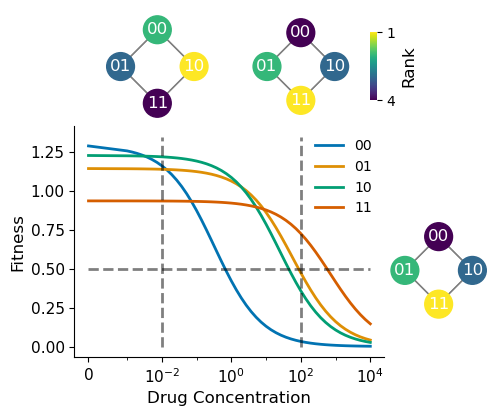

In [10]:
drug_conc_range = [-3,5]
p = Population(fitness_data='random',
               death_model=None,
               n_allele=2,
               death_rate=0.1,
               drug_conc_range = drug_conc_range,
               ic50_limits=[-2.5,3],
               drugless_limits=[0.8,1.5])

p.drugless_rates = [1.28949852, 1.14399848, 1.22802236, 0.93619847]
p.ic50 = [-0.49205992, 1.76224515,  1.39341393,  2.84653598]

xdata = np.logspace(-3,4)
xdata = np.append([0],xdata)

fig,ax = plt.subplots(figsize=(4,3))

for i in range(4):
    ydata = []
    for x in xdata:
        ydata.append(fitness.gen_fitness(p,i,x))
    ax.plot(xdata,ydata,linewidth=2,label=int_to_binary(i),color=cmap[i])

ax.set_xscale('symlog',linthresh=10**-3)

vert_lines_ydata = [0,1.35]

ax,lax1 = plotter.add_landscape_to_fitness_curve(10**-2,ax,p,square=True,
                                                 ypos=0.3,colorbar=False,
                                                 vert_lines_ydata=vert_lines_ydata,
                                                 vert_lines_kwargs={'linewidth':2,'alpha':0.5},
                                                 textsize=12,node_size=400,textcolor='white')

ax,lax2 = plotter.add_landscape_to_fitness_curve(10**2,ax,p,square=True,
                                                 ypos=0.3,colorbar=True,
                                                 vert_lines_ydata=vert_lines_ydata,
                                                 vert_lines_kwargs={'linewidth':2,'alpha':0.5},
                                                 cbloc=[-0.4,0.12,0.2,0.4],textsize=12,node_size=400,
                                                 textcolor='white')

ax.legend(frameon=False)

# for ax in ax_list:
ax.set_xlabel('Drug Concentration',fontsize=12)
ax.tick_params(axis='both',labelsize=11)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks([0,10**-2,10**0,10**2,10**4])

ax.set_ylabel('Fitness',fontsize=12)

ax.plot([0,10**4],[0.5,0.5],'k--',linewidth=2,alpha=0.5)

axins = ax.inset_axes([0.95,0.15,0.45,0.45])

axins = plotter.plot_landscape(p,ax=axins,conc=10**2,textsize=12,node_size=400,
                               colorbar=False,square=True,textcolor='white')

# fig.tight_layout()

fig.savefig('../figures/tradeoff_example.pdf',bbox_inches='tight')


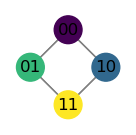

In [4]:
fig,ax = plt.subplots(figsize=(1.5,1.5))

ax = plotter.plot_landscape(p,ax=ax,conc=10**2,textsize=12,node_size=400,colorbar=False)

fig.savefig('../figures/tradeoff_example_landscape.pdf',bbox_inches='tight')

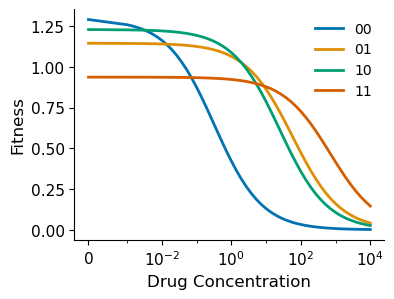

In [13]:
drug_conc_range = [-3,5]
p = Population(fitness_data='random',
               death_model=None,
               n_allele=2,
               death_rate=0.1,
               drug_conc_range = drug_conc_range,
               ic50_limits=[-2.5,3],
               drugless_limits=[0.8,1.5])

p.drugless_rates = [1.28949852, 1.14399848, 1.22802236, 0.93619847]
p.ic50 = [-0.49205992, 1.76224515,  1.39341393,  2.84653598]

xdata = np.logspace(-3,4)
xdata = np.append([0],xdata)

fig,ax = plt.subplots(figsize=(4,3))

for i in range(4):
    ydata = []
    for x in xdata:
        ydata.append(fitness.gen_fitness(p,i,x))
    ax.plot(xdata,ydata,linewidth=2,label=int_to_binary(i),color=cmap[i])

ax.set_xscale('symlog',linthresh=10**-3)

ax.legend(frameon=False)

# for ax in ax_list:
ax.set_xlabel('Drug Concentration',fontsize=12)
ax.tick_params(axis='both',labelsize=11)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks([0,10**-2,10**0,10**2,10**4])

ax.set_ylabel('Fitness',fontsize=12)

fig.savefig('../figures/example_seascape.png',bbox_inches='tight',dpi=500)